## Pima Indians Diabetes Case study
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes. 

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. 
Even though it's incurable, it can be managed by treatment and medication.

Researchers at the Bio-Solutions lab want to get better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes. 

We will use logistic regression to model the "Pima Indians Diabetes" data set. In particular, all patients here are females at least 21 years old of Pima Indian heritage. This model will predict which people are likely to develop diabetes.

## Data Description:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

### Import necessary libraries

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score


# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

### Read the dataset

In [2]:
data = pd.read_csv("pima-indians-diabetes.csv")

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<IPython.core.display.Javascript object>

In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<IPython.core.display.Javascript object>

### Understand the shape of the dataset

In [5]:
data.shape

(768, 9)

<IPython.core.display.Javascript object>

* There are 768 observations and 9 columns in the dataset

### Checking for null values in the data

In [6]:
data.isnull().values.any()

False

<IPython.core.display.Javascript object>

* We don't have missing values in the data.

#### Distribution of variables in the data

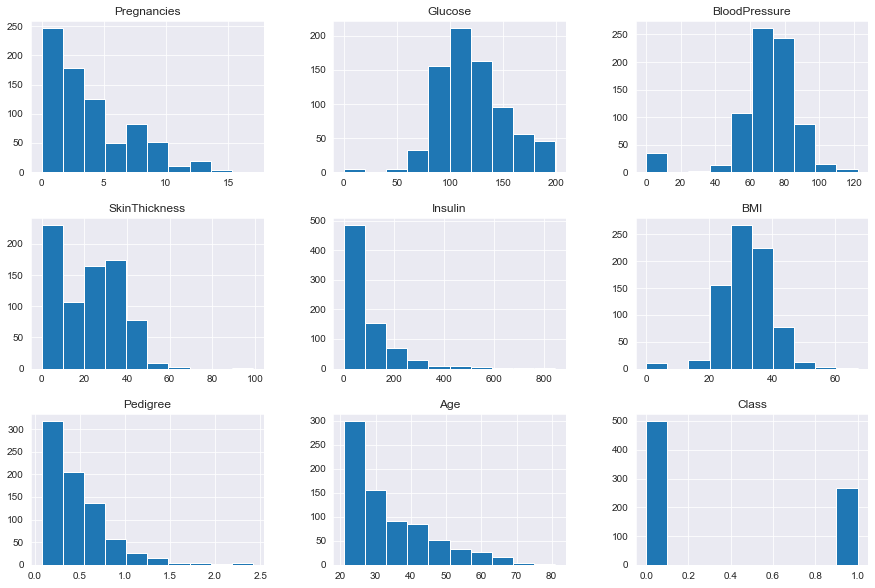

<IPython.core.display.Javascript object>

In [7]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

* We can see that Glucose, BloodPressure, SkinThickness, Insulin, BMI have obervations with 0 values, which is not possible. These are data entry errors and we should fix it.
* We will replace 0 values in all the columns except Pregnancies and Class with the NaN (this will help us deal with the missing values elegantly)
* We will impute missing (NaN) values with the mean.

In [8]:
# defining columns where we need to replace 0 with NaN
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Pedigree"]

<IPython.core.display.Javascript object>

In [9]:
# replacing 0 with NaN
data[cols] = data[cols].replace(0, np.nan)

<IPython.core.display.Javascript object>

In [10]:
# let's check missing values in the data again
data.isna().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Class              0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# Let's impute missing values using mean value
data[cols] = data[cols].fillna(data[cols].mean())

<IPython.core.display.Javascript object>

In [12]:
# let's check missing values in the data again
data.isna().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

<IPython.core.display.Javascript object>

* We have imputed all the data entry errors with the mean values.

### Bivariate Analysis

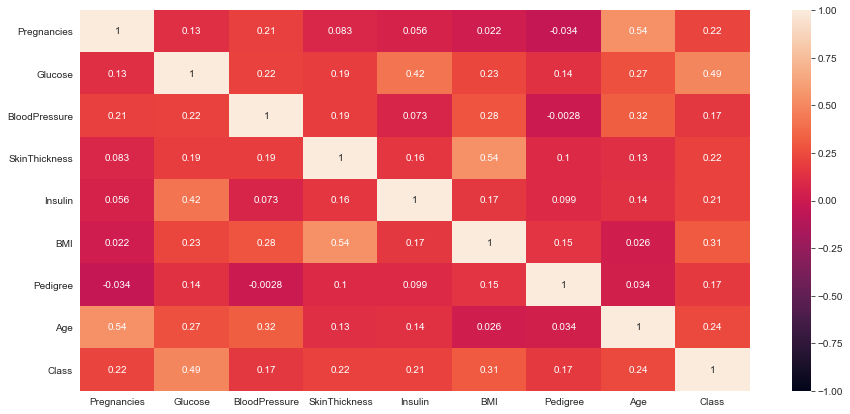

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

* No significant case of high correlation among variables observed

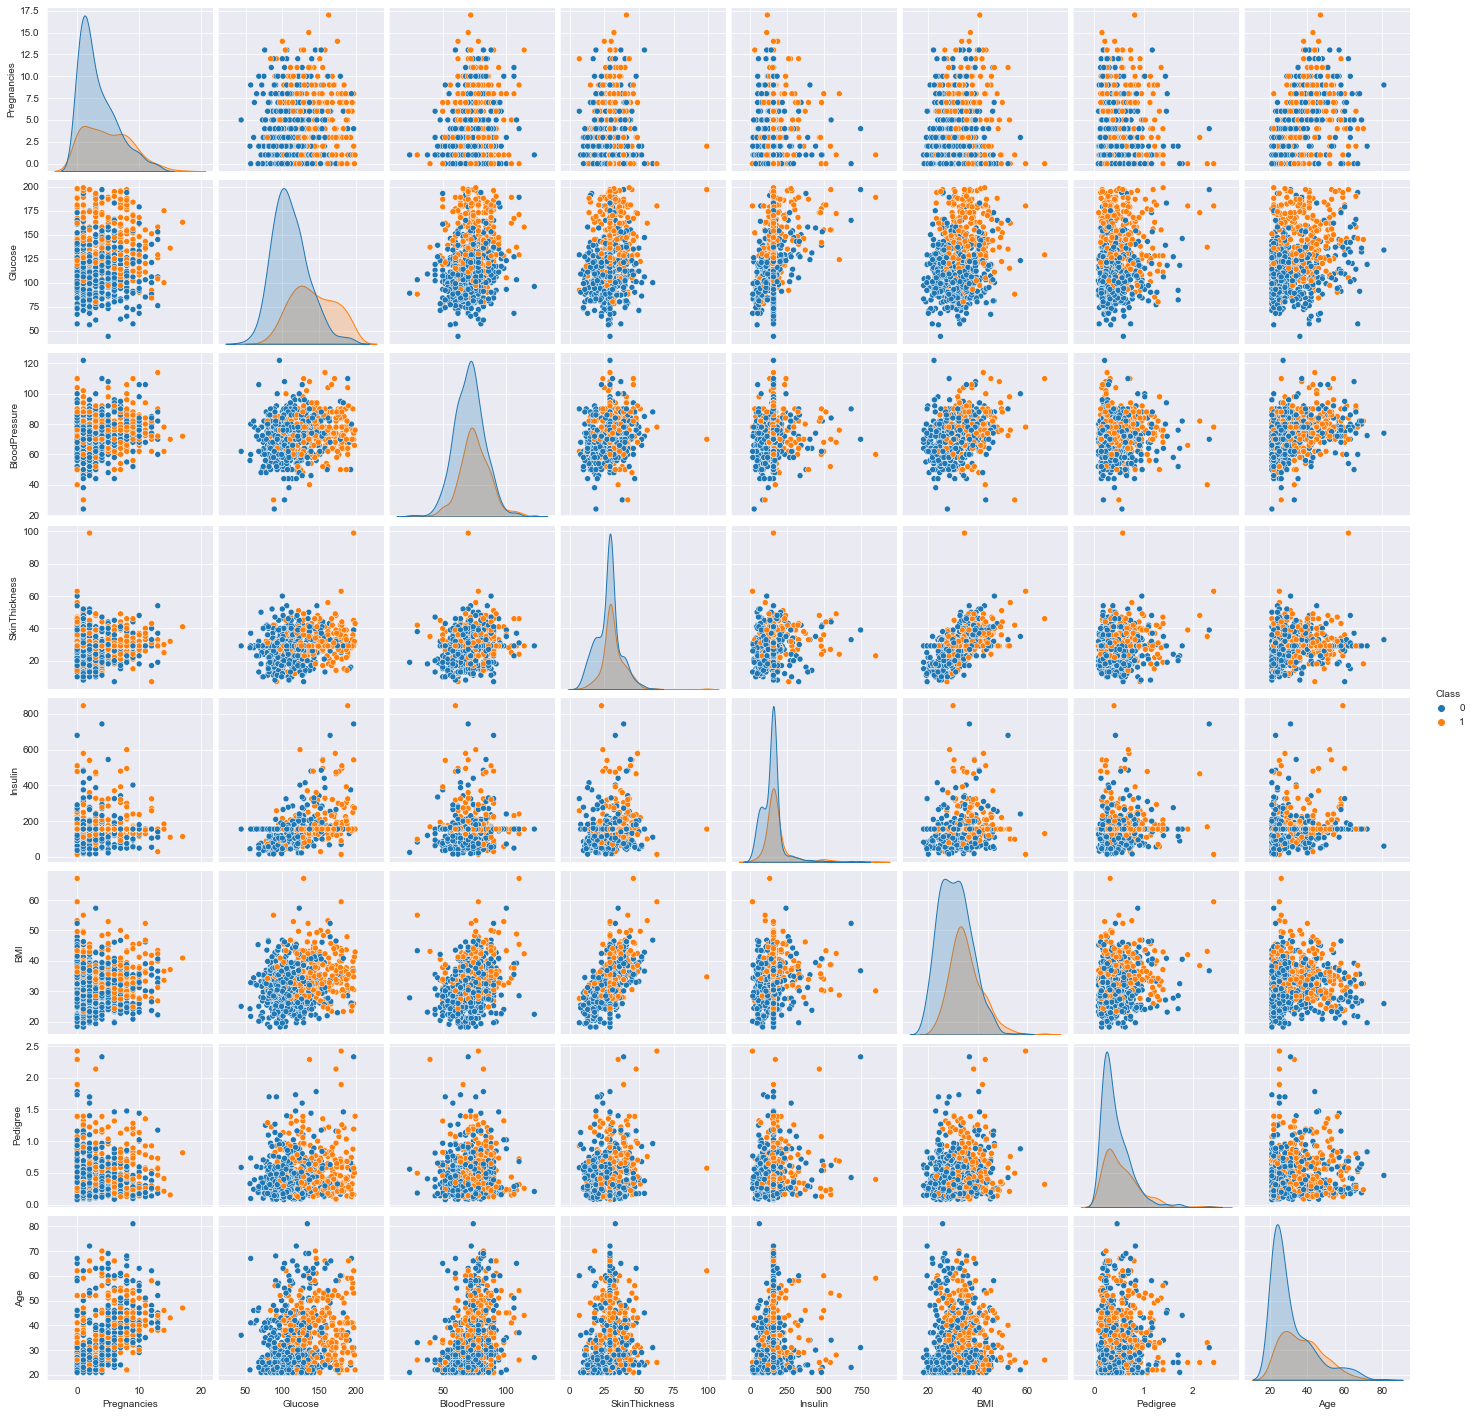

<IPython.core.display.Javascript object>

In [14]:
sns.pairplot(data, hue="Class")
plt.show()

* Pregnancy and Age have a linear relation.
* Age and Blood Pressure have little relation. Most of the aged people have Blood pressure.
* Insulin and Glucose have some relation.
* The distribution plots on diagonals for Class 0 and 1 seems to overlap a little.

### Let's look at the distribution of target variable

In [15]:
data["Class"].value_counts()

0    500
1    268
Name: Class, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
data["Class"].value_counts(1)

0    0.651042
1    0.348958
Name: Class, dtype: float64

<IPython.core.display.Javascript object>

* The number of observations where the person is non-diabetic are 500 which is 65% of the total data available.

### Splitting data into train and test

In [17]:
X = data.drop(["Class"], axis=1)
Y = data["Class"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

**The Stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

### Fitting Logistic Regression model

In [18]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.449508
         Iterations 6


<IPython.core.display.Javascript object>

In [19]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.3045
Time:                        13:17:29   Log-Likelihood:                -241.39
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.518e-41
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.7226      1.021     -9.522      0.000     -11.724      -7.721
Pregnancies       0.1445      0.039      3.706      0.000       0.068       0.221
Glucose           0.0363      0.005     

<IPython.core.display.Javascript object>

* The coefficients of the logistic regression model are in terms of log(odd).
* `P>|z|`: The interpretation of p-values is similar to that in Linear Regression.

### Checking model performance

In [20]:
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

<IPython.core.display.Javascript object>

#### Lets see the confusion matrix on training set

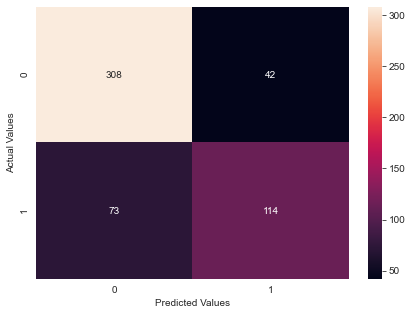

<IPython.core.display.Javascript object>

In [21]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### The confusion matrix

* True Positives (TP):  A person has diabetes and the model predicted person has diabetes.
* True Negatives (TN): A person doesn't have diabetes and the model predicted person doesn't have diabetes.
* False Positives (FP): The model predicted person has diabetes but the person doesn't have diabetes.
* False Negatives (FN): The model predicted person doesn't have diabetes but the person has diabetes.

#### Lets check the accuracy model

In [22]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

Accuracy on training set :  0.7858472998137802


<IPython.core.display.Javascript object>

* The model seems to be performing well on the training set.

#### But to make interpretations from the model, first we will have to remove multicollinearity from the data to get reliable coefficients and p-values. 
* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Checking for Multicollinearity

In [23]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const            55.156267
Pregnancies       1.418041
Glucose           1.358583
BloodPressure     1.226593
SkinThickness     1.446856
Insulin           1.227806
BMI               1.546783
Pedigree          1.054447
Age               1.637294
dtype: float64



<IPython.core.display.Javascript object>

* We observe that there is no multicollinearity present in the data.
* Hence, The values of coefficient and p-values are reliable.
* Let's remove the insignificant variables (p-value > 0.05) from data.

### Removing insignificant variables (p-value > 0.05 )

In [24]:
# summary of initial logistic regression model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.3045
Time:                        13:22:44   Log-Likelihood:                -241.39
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.518e-41
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.7226      1.021     -9.522      0.000     -11.724      -7.721
Pregnancies       0.1445      0.039      3.706      0.000       0.068       0.221
Glucose           0.0363      0.005     

<IPython.core.display.Javascript object>

**Dropping SkinThickness as it has the highest p-value**

In [25]:
X_train1 = X_train.drop("SkinThickness", axis=1)

<IPython.core.display.Javascript object>

In [26]:
# fitting the model on training set
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

pred_train1 = lg1.predict(X_train1)
pred_train1 = np.round(pred_train1)


print("Accuracy on training set : ", accuracy_score(y_train, pred_train1))

Optimization terminated successfully.
         Current function value: 0.449511
         Iterations 6
Accuracy on training set :  0.7858472998137802


<IPython.core.display.Javascript object>

* There is no significant change in the model performance as compared to initial model.

In [27]:
# checking summary of the model
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.3045
Time:                        13:23:29   Log-Likelihood:                -241.39
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 4.406e-42
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.7189      1.018     -9.548      0.000     -11.714      -7.724
Pregnancies       0.1446      0.039      3.707      0.000       0.068       0.221
Glucose           0.0363      0.005     

<IPython.core.display.Javascript object>

**Dropping Blood Pressure with the highest p-value**

In [28]:
X_train2 = X_train1.drop("BloodPressure", axis=1)

<IPython.core.display.Javascript object>

In [29]:
# fitting the model on training set
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

pred_train2 = lg2.predict(X_train2)
pred_train2 = np.round(pred_train2)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train2))

Optimization terminated successfully.
         Current function value: 0.449630
         Iterations 6
Accuracy on training set :  0.7839851024208566


<IPython.core.display.Javascript object>

* There is no significant change in the model performance as compared to initial model.

In [30]:
## checking summary of the model
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            6
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.3043
Time:                        13:23:41   Log-Likelihood:                -241.45
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 7.548e-43
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.8778      0.919    -10.744      0.000     -11.680      -8.076
Pregnancies     0.1442      0.039      3.702      0.000       0.068       0.220
Glucose         0.0361      0.005      7.837    

<IPython.core.display.Javascript object>

**Dropping Insulin with highest p-value**

In [31]:
X_train3 = X_train2.drop("Insulin", axis=1)

<IPython.core.display.Javascript object>

In [32]:
# fitting the model on training set
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

pred_train3 = lg3.predict(X_train3)
pred_train3 = np.round(pred_train3)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train3))

Optimization terminated successfully.
         Current function value: 0.450056
         Iterations 6
Accuracy on training set :  0.7858472998137802


<IPython.core.display.Javascript object>

* There is no significant change in the model performance as compared to initial model.

In [33]:
## checking summary of the model
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      531
Method:                           MLE   Df Model:                            5
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.3037
Time:                        13:25:26   Log-Likelihood:                -241.68
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.378e-43
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.8936      0.921    -10.746      0.000     -11.698      -8.089
Pregnancies     0.1440      0.039      3.686      0.000       0.067       0.221
Glucose         0.0372      0.004      8.584    

<IPython.core.display.Javascript object>

**Dropping Age with highest p-value**

In [34]:
X_train4 = X_train3.drop("Age", axis=1)

<IPython.core.display.Javascript object>

In [35]:
# fitting the model on training set
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

pred_train4 = lg4.predict(X_train4)
pred_train4 = np.round(pred_train4)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Optimization terminated successfully.
         Current function value: 0.451011
         Iterations 6
Accuracy on training set :  0.7821229050279329


<IPython.core.display.Javascript object>

* There is no significant change in the model performance as compared to initial model.

In [36]:
## checking summary of the model
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      532
Method:                           MLE   Df Model:                            4
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.3022
Time:                        13:25:32   Log-Likelihood:                -242.19
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.951e-44
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.6760      0.890    -10.873      0.000     -11.420      -7.932
Pregnancies     0.1645      0.034      4.881      0.000       0.098       0.231
Glucose         0.0381      0.004      8.943    

<IPython.core.display.Javascript object>

* Now all the columns left are significant predictors, let's check the model performance and make interpretations.

### Coefficient interpretations

* Coefficient of all the variables are positive. An increase in these will lead to increase in chances of a person having diabetes.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [37]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train4.columns, columns=["odds"]).T

,const,Pregnancies,Glucose,BMI,Pedigree
odds,0.000063,1.178781,1.038845,1.097174,2.841249


<IPython.core.display.Javascript object>

**Percentage change in odds**

In [38]:
# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train4.columns, columns=["change_odds%"]).T

,const,Pregnancies,Glucose,BMI,Pedigree
change_odds%,-99.993723,17.878143,3.884519,9.717385,184.124936


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `Pregnancies`: Holding all other features constant, a unit change in Pregnancy will increase the odds of a person having diabetes by 1.787 times or a 17.87% increase in the odds of having diabetes.

* `Glucose`: Holding all other features constant, a unit change in Glucose will increase the odds of a person having diabetes by 1.03 times or a 3.88% increase in the odds of having diabetes.

* `BMI`: Holding all other features constant, a unit change in BMI will increase the odds of a person having diabetes by 1.097 times or a 9.71% increase in the odds of having diabetes.

* `Pedigree`: Holding all other features constant, a unit change in Pedigree will increase the odds of a person having diabetes by 2.84 times or a 184.12% increase in the odds of having diabetes.

### Performance Metrics of the final model - 'lg4'

**Confusion Matrix on training set**

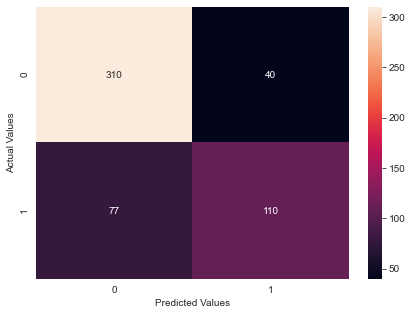

<IPython.core.display.Javascript object>

In [39]:
cm = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**Accuracy on training set**

In [40]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Accuracy on training set :  0.7821229050279329


<IPython.core.display.Javascript object>

**ROC-AUC on training set**

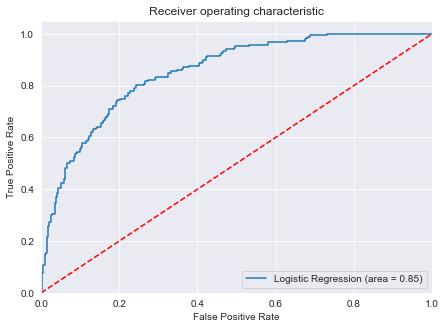

<IPython.core.display.Javascript object>

In [41]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(X_train4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is performing well on the training set.

### We can now use the model for making predictions on the test data.

In [42]:
# dropping variables from test set as well which were dropped from training set
X_test = X_test.drop(["SkinThickness", "BloodPressure", "Insulin", "Age"], axis=1)

<IPython.core.display.Javascript object>

In [43]:
pred_test = lg4.predict(X_test) > 0.5
pred_test = np.round(pred_test)

<IPython.core.display.Javascript object>

In [44]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.7821229050279329
Accuracy on test set :  0.7489177489177489


<IPython.core.display.Javascript object>

* Logistic Regression has given a generalized performance on training and test set.